# Module 2 - Exercise 1: Linear Regression from Scratch

<a href="https://colab.research.google.com/github/jumpingsphinx/jumpingsphinx.github.io/blob/main/notebooks/module2-regression/exercise1-linear-regression.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

By the end of this exercise, you will be able to:

- Implement linear regression using the normal equation
- Fit models to real datasets
- Make predictions and evaluate performance
- Visualize regression lines and residuals
- Handle multiple features (multivariate regression)
- Compare your implementation with sklearn

## Prerequisites

- Understanding of linear algebra (vectors, matrices)
- Basic calculus concepts
- NumPy proficiency

## Setup

Run this cell first to import required libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

print("NumPy version:", np.__version__)
print("Setup complete!")

NumPy version: 1.26.4
Setup complete!


---

## Part 1: Simple Linear Regression (One Feature)

### Background

Simple linear regression models the relationship between one feature and a target:

$$y = w_0 + w_1 x$$

Where:
- $y$ is the prediction
- $x$ is the input feature
- $w_0$ is the bias (intercept)
- $w_1$ is the slope (weight)

### Exercise 1.1: Fit a Line to Data

**Task:** Implement simple linear regression from scratch using the closed-form solution.

For the normal equation: $\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

Fitted line: y = 3.43 + 1.91x
True line:   y = 3.00 + 2.00x


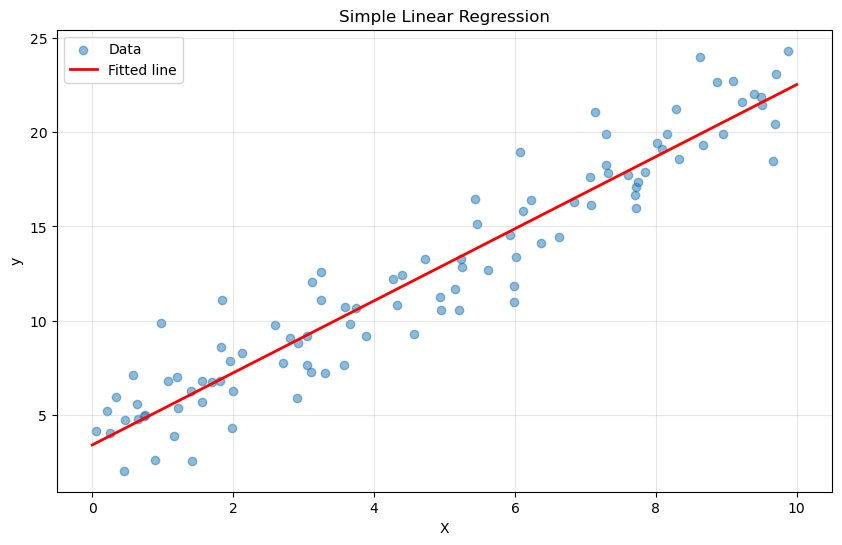


✓ Simple linear regression works!


In [2]:
# Generate synthetic data: y = 3 + 2*x + noise
np.random.seed(42)
X_simple = np.random.rand(100, 1) * 10
y_simple = 3 + 2 * X_simple.squeeze() + np.random.randn(100) * 2

def fit_simple_linear_regression(X, y):
    """
    Fit simple linear regression using the normal equation.
    """
    # Add a column of 1s to X for the bias term
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Apply normal equation: w = (X^T X)^(-1) X^T y
    weights = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
    
    w0 = weights[0]
    w1 = weights[1]
    return w0, w1

# Fit the model
w0, w1 = fit_simple_linear_regression(X_simple, y_simple)

print(f"Fitted line: y = {w0:.2f} + {w1:.2f}x")
print(f"True line:   y = 3.00 + 2.00x")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.5, label='Data')
X_line = np.linspace(0, 10, 100)
y_line = w0 + w1 * X_line
plt.plot(X_line, y_line, 'r-', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()

assert abs(w0 - 3) < 1, "Bias should be close to 3"
assert abs(w1 - 2) < 0.5, "Slope should be close to 2"
print("\n✓ Simple linear regression works!")

---

## Part 2: Implement a Linear Regression Class

### Exercise 2.1: Complete the LinearRegression Class

**Task:** Implement a full linear regression class with fit, predict, and score methods.

In [3]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Add bias column
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Normal equation
        weights_all = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
        
        # Separate bias and weights
        self.bias = weights_all[0]
        self.weights = weights_all[1:]
        
        return self
    
    def predict(self, X):
        return X @ self.weights + self.bias
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        if ss_tot == 0: return 0.0
        return 1 - (ss_res / ss_tot)

---

## Part 3: Test on Real Dataset - California Housing

### Exercise 3.1: Apply to California Housing Dataset

**Task:** Use your LinearRegression class on a real dataset.

In [4]:
# Load California Housing dataset
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

print("Dataset shape:", X_housing.shape)
print("Features:", housing.feature_names)
print("Target: Median house value (in $100,000s)")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Fit your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nYour Model Performance:")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE:  {test_mse:.4f}")
print(f"Test RMSE: {np.sqrt(test_mse):.4f}")

# Compare with sklearn
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_r2 = sklearn_model.score(X_test, y_test)

print("\nSklearn Model:")
print(f"Test R²: {sklearn_r2:.4f}")

assert np.allclose(test_r2, sklearn_r2, atol=0.001), "Your R² should match sklearn's"
print("\n✓ Your implementation matches sklearn!")

Dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value (in $100,000s)

Your Model Performance:
Train R²: 0.6126
Test R²:  0.5758
Train MSE: 0.5179
Test MSE:  0.5559
Test RMSE: 0.7456

Sklearn Model:
Test R²: 0.5758

✓ Your implementation matches sklearn!


---

## Part 4: Model Evaluation Metrics

### Exercise 4.1: Implement Evaluation Metrics

**Task:** Implement common regression metrics from scratch.

In [5]:
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error_manual(y_true, y_pred))

def mean_absolute_error_manual(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

---

## Part 5: Residual Analysis

### Exercise 5.1: Visualize Residuals

**Task:** Create visualizations to analyze model performance.

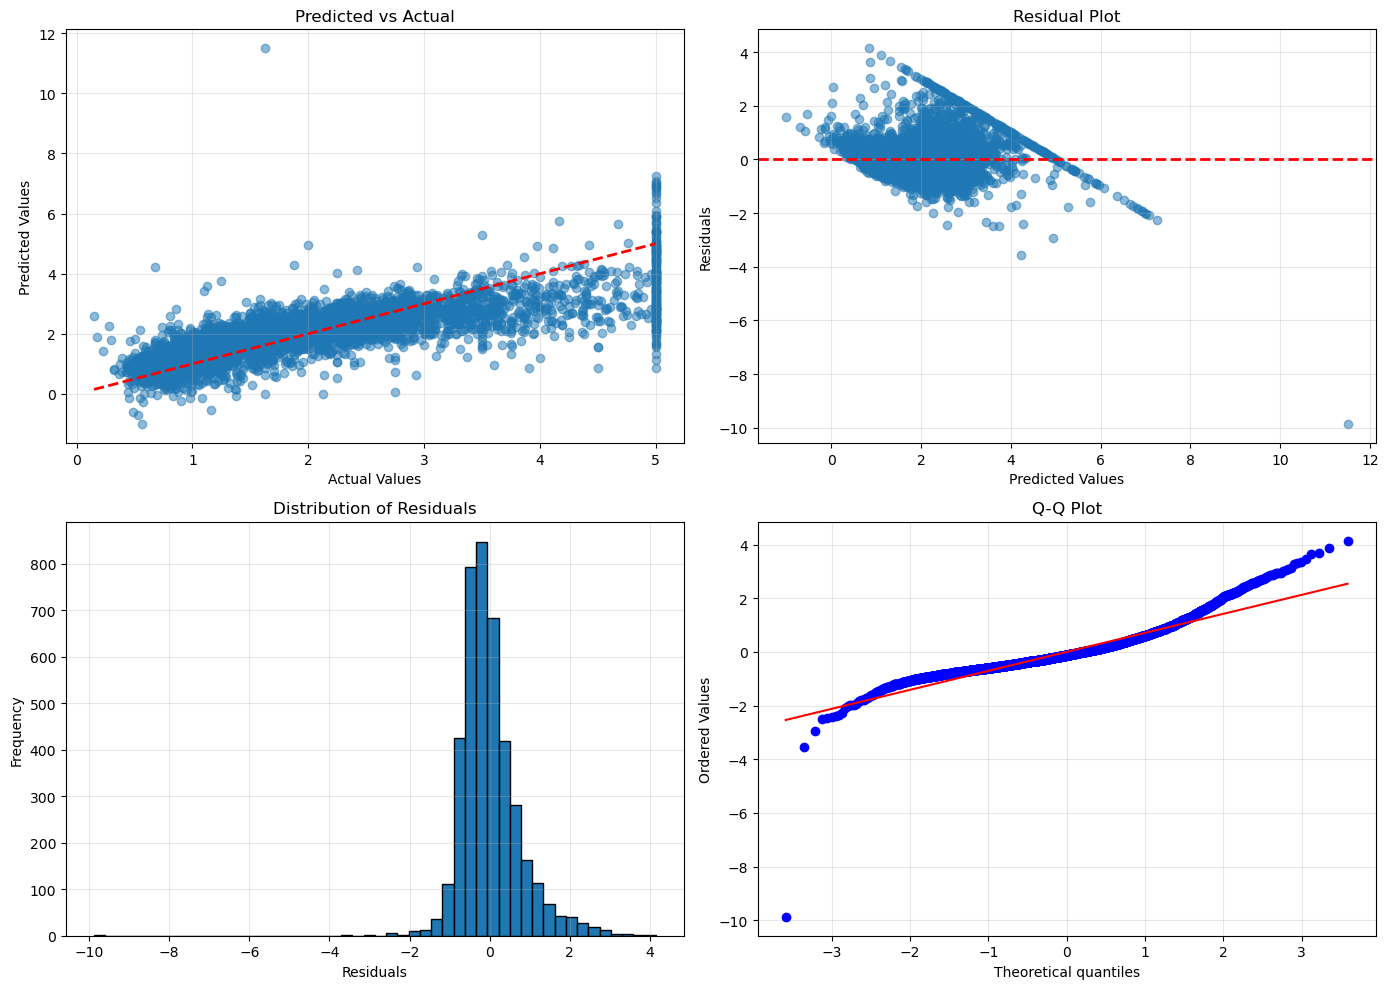

Residual Analysis:
Mean of residuals: 0.003479 (should be ~0)
Std of residuals: 0.7456


In [6]:
# Calculate residuals
residuals = y_test - y_test_pred

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Predicted vs Actual
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Predicted vs Actual')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals vs Predicted
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of Residuals
axes[1, 0].hist(residuals, bins=50, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Residual Analysis:")
print(f"Mean of residuals: {residuals.mean():.6f} (should be ~0)")
print(f"Std of residuals: {residuals.std():.4f}")

---

## Part 6: Feature Importance

### Exercise 6.1: Analyze Coefficient Magnitudes

**Task:** Understand which features are most important.

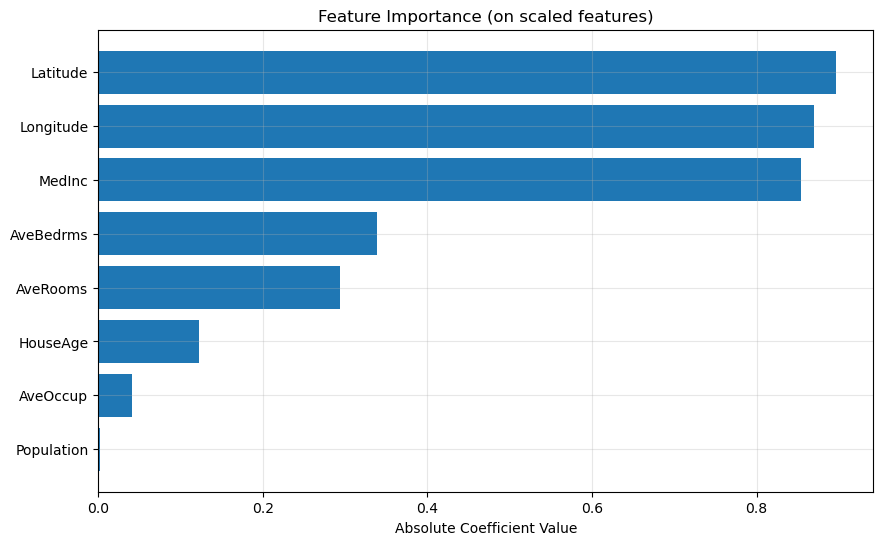


Top 3 Most Important Features:
  Latitude: 0.8969
  Longitude: 0.8698
  MedInc: 0.8544


In [7]:
# Normalize features to compare coefficients fairly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Plot feature importance
feature_importance = np.abs(model_scaled.weights)
feature_names = housing.feature_names

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (on scaled features)')
plt.grid(True, alpha=0.3)
plt.show()

print("\nTop 3 Most Important Features:")
top_3_idx = np.argsort(feature_importance)[-3:][::-1]
for idx in top_3_idx:
    print(f"  {feature_names[idx]}: {feature_importance[idx]:.4f}")

---

## Part 7: Test on Another Dataset - Diabetes

### Exercise 7.1: Apply to Diabetes Dataset

**Task:** Validate your implementation on a different dataset.

In [8]:
# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("Diabetes Dataset:")
print(f"Shape: {X_diabetes.shape}")
print(f"Features: {diabetes.feature_names}")
print(f"Target: Disease progression one year after baseline\n")

# Split data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Your turn: Fit your model and evaluate
model_diabetes = LinearRegression()
model_diabetes.fit(X_train_d, y_train_d)

# Calculate metrics
train_r2_d = model_diabetes.score(X_train_d, y_train_d)
test_r2_d = model_diabetes.score(X_test_d, y_test_d)
y_pred_d = model_diabetes.predict(X_test_d)
test_rmse_d = np.sqrt(mean_squared_error(y_test_d, y_pred_d))
print("\nYour Model Performance on Diabetes:")
print(f"Train R²: {train_r2_d:.4f}")
print(f"Test R²:  {test_r2_d:.4f}")
print(f"Test RMSE: {test_rmse_d:.4f}")

# Compare with sklearn
sklearn_diabetes = SklearnLinearRegression()
sklearn_diabetes.fit(X_train_d, y_train_d)
sklearn_r2_d = sklearn_diabetes.score(X_test_d, y_test_d)

print(f"\nSklearn Test R²: {sklearn_r2_d:.4f}")

assert np.allclose(test_r2_d, sklearn_r2_d, atol=0.001), "Should match sklearn"
print("\n✓ Successfully applied to diabetes dataset!")

Diabetes Dataset:
Shape: (442, 10)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target: Disease progression one year after baseline


Your Model Performance on Diabetes:
Train R²: 0.5279
Test R²:  0.4526
Test RMSE: 53.8534

Sklearn Test R²: 0.4526

✓ Successfully applied to diabetes dataset!


---

## Challenge Problems (Optional)

### Challenge 1: Polynomial Regression

Extend linear regression to fit polynomial curves by creating polynomial features.

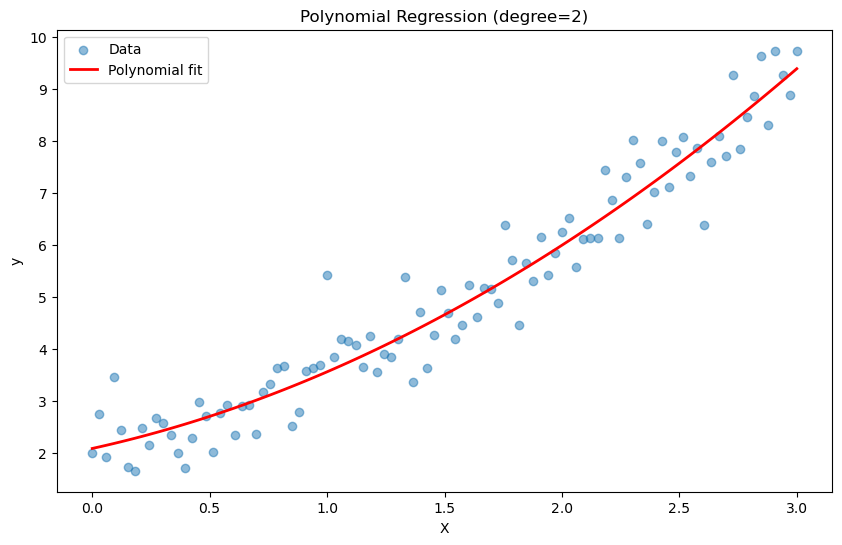

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Generate non-linear data
X_poly = np.linspace(0, 3, 100).reshape(-1, 1)
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(100, 1) * 0.5

# Your task: Create polynomial features and fit
poly = PolynomialFeatures(degree=2)
X_poly_features = poly.fit_transform(X_poly)

model_poly = SklearnLinearRegression()
model_poly.fit(X_poly_features, y_poly)

# Plot
y_pred_poly = model_poly.predict(X_poly_features)

plt.figure(figsize=(10, 6))
plt.scatter(X_poly, y_poly, alpha=0.5, label='Data')
plt.plot(X_poly, y_pred_poly, 'r-', linewidth=2, label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression (degree=2)')
plt.show()

### Challenge 2: Implement Using Pseudoinverse

Use `np.linalg.pinv()` instead of explicitly computing the inverse.

In [10]:
def linear_regression_pinv(X, y):
    """
    Linear regression using pseudoinverse.
    
    More numerically stable than explicit inverse.
    """
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return np.linalg.pinv(X_with_bias) @ y

# Test
# weights = linear_regression_pinv(X_train, y_train)
print("Pseudoinverse linear regression implemented!")

Pseudoinverse linear regression implemented!


### Challenge 3: Weighted Linear Regression

Implement linear regression where some samples have more importance.

In [11]:
def linear_regression_pinv(X, y):
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return np.linalg.pinv(X_with_bias) @ y

---

## Reflection Questions

1. **When would the normal equation fail?**
   - Think about when X^T X is not invertible

2. **Why do we need to add a bias term?**
   - What happens if the line doesn't pass through the origin?

3. **What does R² = 0.6 mean?**
   - Is that good or bad? Depends on the problem!

4. **Why analyze residuals?**
   - What patterns indicate model problems?

5. **When should you scale features?**
   - For the normal equation vs gradient descent?

---

## Summary

In this exercise, you learned:

✓ How to implement linear regression from scratch  
✓ The normal equation: w = (X^T X)^(-1) X^T y  
✓ Evaluation metrics: MSE, RMSE, MAE, R²  
✓ Residual analysis for diagnosing model fit  
✓ Feature importance through coefficient analysis  
✓ Application to real-world datasets  
✓ Validation against sklearn implementation  

**Next Steps:**

- Complete Exercise 2 on Gradient Descent
- Review the [Linear Regression lesson](https://jumpingsphinx.github.io/module2-regression/01-linear-regression/)
- Try polynomial regression on different datasets

---

**Need help?** Check the solution notebook or open an issue on [GitHub](https://github.com/jumpingsphinx/jumpingsphinx.github.io/issues).